In [48]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
%matplotlib inline

In [49]:
df = pd.read_csv('wa_fn-usec_-telco-customer-churn-9885c2ea-5e03-41a3-8198-0670a1109729-ceeff6fe-e4f2-4285-a5b6-1e7941d1f9d2.csv')

In [50]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [51]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [52]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Задание 1

Давайте продолжим искать переменные, которые разделяют факт ухода клиента. Посмотрим, влияет ли флаг пенсионера на вероятность оттока. Постройте диаграмму, которая могла бы ответить на этот вопрос.

In [53]:
df_temp = df.groupby(['SeniorCitizen', 'Churn']).agg({'customerID': 'count'})
df_temp.columns = ['count']
df_temp = df_temp.reset_index()
df_temp

,SeniorCitizen,Churn,count
0,0,No,4508
1,0,Yes,1393
2,1,No,666
3,1,Yes,476


<Axes: xlabel='SeniorCitizen', ylabel='count'>

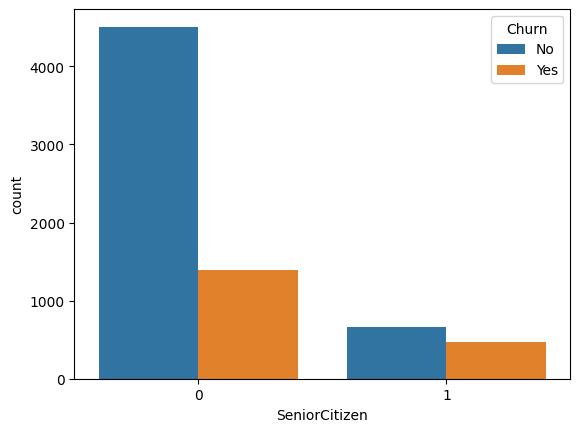

In [54]:
sns.barplot(data=df_temp, x='SeniorCitizen', y='count', hue='Churn')

## Задание 2

Если у клиента подключен интернет, то ему доступны 6 дополнительных услуг, а именно: онлайн защита, онлайновое резервное копирование, защита устройства, наличие ТВ, наличие доступа к фильмам. Скорее всего, чтобы удержать клиента нам выгодно по-максимуму погружать его в нашу экосистему. Давайте посмотрим, зависит ли % оттекших клиентов от кол-ва услуг, которые у них были подключены (по клиентам, у кого подключен интернет) ? Одинаковая ли зависимость на разных типах интернета? Подберите тип визуализации и постройте график\диаграмму, который смог бы ответить на эти вопросы.

In [55]:
# df_temp = df[df['InternetService'] != 'No'].groupby(['InternetService']).agg({
#     service: lambda x: (x == 'Yes').sum() for service in [
#         'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
#     ]
# })
def count_yes(row):
    res = 0
    for x in row:
        res += (x == 'Yes')
    return res

services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
df['ServiceCount'] = df[services].apply(count_yes, axis=1)
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ServiceCount
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,0,2
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,2
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,0


In [57]:
df_temp = df[df['InternetService'] != 'No'].groupby(['InternetService', 'ServiceCount']).agg({'customerID': 'nunique', 'Churn': 'mean'}).reset_index()
df_temp.columns = ['InternetService', 'ServiceCount', 'customerAmount', 'churnFrac']
df_temp


,InternetService,ServiceCount,customerAmount,churnFrac
0,DSL,0,294,0.411565
1,DSL,1,415,0.322892
2,DSL,2,454,0.202643
3,DSL,3,475,0.130526
4,DSL,4,359,0.091922
5,DSL,5,281,0.053381
6,DSL,6,143,0.013986
7,Fiber optic,0,399,0.604010
8,Fiber optic,1,551,0.558984
9,Fiber optic,2,579,0.480138


<Axes: xlabel='ServiceCount', ylabel='churnFrac'>

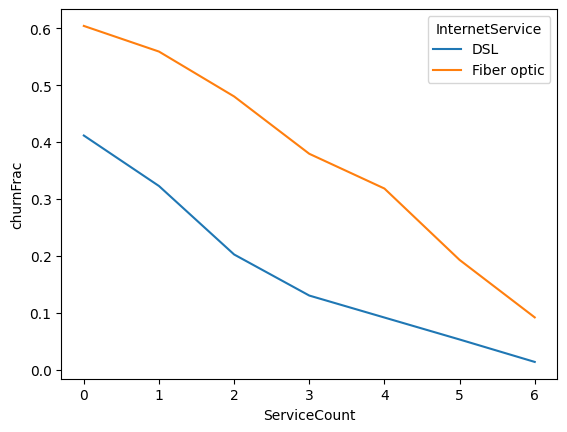

In [60]:
sns.lineplot(data=df_temp, x='ServiceCount', y='churnFrac', hue='InternetService')